###  Project: Building a Handwritten Digits Classifier
in this project we will
- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

we gonna use several deep feedforward neuroal networks to classify images. The dataset of images will be from sklearn.datasets with the load_digits() function which returns a copy of the hand-written


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

### Loading the data (digits)

In [3]:
digits=load_digits()

In [4]:
digits.keys()

dict_keys(['target_names', 'target', 'data', 'DESCR', 'images'])

In [5]:
features=pd.DataFrame(digits['data'])

In [6]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
labels=pd.Series(digits.target)

In [8]:
labels[21]

1

In [9]:
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [10]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

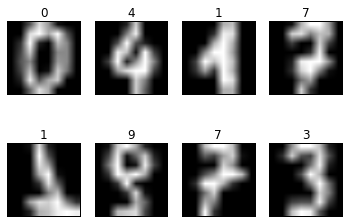

In [11]:
#visualise the images
#can be done by reshaping the data to a (8,8) dimension 
#or direclty with digits.images which are already in 8*8 pixels
fig, axs = plt.subplots(2,4)
plt.gray()
i=0
for j in [0 ,100,200,300]:
    axs[0,i].imshow(features.loc[j].values.reshape(8,8))
    axs[0,i].set_title(labels[j])
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])
    i +=1

i=0
for j in [1000 ,1100,1200,1300]:
    axs[1,i].imshow(features.loc[j].values.reshape(8,8))
    axs[1,i].set_title(labels[j])
    axs[1,i].set_xticks([])
    axs[1,i].set_yticks([])
    i +=1

### train a Knn model 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
def train(k,train_features,train_labels):
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_features, train_labels)
    return knn

def test(model,test_features,test_labels):
    predictions = model.predict(test_features)
    #check accuracy of our model on the test data
    #accuracy=model.score(test_features, test_labels)
    accuracy=sum(predictions==test_labels)/len(test_labels)
    return accuracy
from sklearn.model_selection import cross_val_score, KFold

def cross_validate(k):
    kf = KFold(n_splits=4, shuffle=True, random_state=2)
    accuracies=[]
#for each loop: split the data, train the model, make predictions
    for train_index, test_index in kf.split(features):
        train_features=features.loc[train_index]
        test_features=features.loc[test_index]
        train_labels=labels.loc[train_index]
        test_labels = labels.loc[test_index]
        model=train(k,train_features,train_labels)
        accuracy=test(model,test_features,test_labels)
        accuracies.append(accuracy)
    average_accuracy=np.mean(accuracies)
    return average_accuracy

In [17]:
k_values=[1,3,5,7,9,11,15,20,30,50,70,100]
averages_accuracies=[]
for k in k_values:
    accuracy=cross_validate(k)
    averages_accuracies.append(accuracy)

In [18]:
averages_accuracies

[0.9888728037614452,
 0.9872011878247959,
 0.9849777282850779,
 0.9844221727295223,
 0.9827567433803515,
 0.9799715416975996,
 0.9755233853006681,
 0.9699591685226429,
 0.9604998762682505,
 0.9404664686958675,
 0.9298911160603811,
 0.9148676070279633]

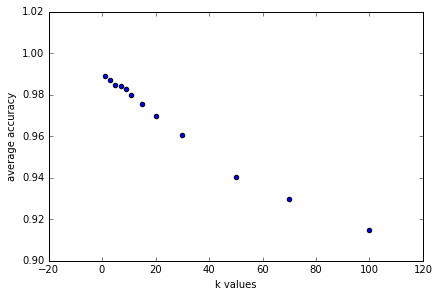

In [19]:
plt.scatter(k_values,averages_accuracies)
plt.tight_layout()
plt.xlabel('k values')
plt.ylabel('average accuracy')
plt.show()

We can observe than the increase of the number of neighbors decrease the accuracy

### NN with one hidden layer 

In [20]:
from sklearn.neural_network import MLPClassifier

In [40]:
kf = KFold(n_splits=4, shuffle=True, random_state=2)
nn_test_accuracies=[]
nn_train_accuracies=[]
neurons=[8,16,32,64,128,256]
#we test different number of neurons in the hidden layer  
for n in neurons:
    print(n)
    fold_train_accuracies=[]
    fold_test_accuracies=[]
    #split data
    for train_index, test_index in kf.split(features):
        train_features=features.loc[train_index]
        test_features=features.loc[test_index]
        train_labels=labels.loc[train_index]
        test_labels = labels.loc[test_index]

        #train the model    
        nn=MLPClassifier(hidden_layer_sizes=(n),activation='logistic')
        nn.fit(train_features,train_labels)
        fold_train_accuracy=nn.score(train_features,train_labels)
        fold_train_accuracies.append(fold_train_accuracy)
        
        #predict
        prediction=nn.predict(test_features)
        fold_test_accuracy=nn.score(test_features,test_labels)
        fold_test_accuracies.append(fold_test_accuracy)
        
    #report mean accuracy for each number of neuros
    nn_test_accuracies.append(np.mean(fold_test_accuracies))
    nn_train_accuracies.append(np.mean(fold_train_accuracies))
    print('for n={} the accurency is '.format(n),np.mean(nn_test_accuracies))    

8


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



for n=8 the accurency is  0.9120687948527592
16
for n=16 the accurency is  0.9340590200445433
32
for n=32 the accurency is  0.945839313701229
64
for n=64 the accurency is  0.9538158871566444
128
for n=128 the accurency is  0.9584909675822816
256
for n=256 the accurency is  0.9620712694877506


ValueError: x and y must have same first dimension

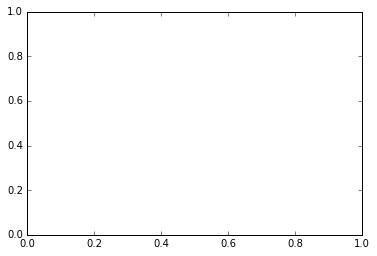

In [52]:
plt.plot([8,16,32,64,128,256],nn_train_accuracies,label='train')
plt.plot([8,16,32,64,128,256],nn_test_accuracies,label='test')
plt.legend()
plt.title("Mean Accuracy vs. Neurons In One Hidden Layers")
plt.xlabel('# of neurons in the hidden layer')

#####  observations 
there are already an overfitting with 32 neurons as seen on the graph above

In [42]:
nn_train_accuracies

[0.9523304618021364, 0.9914673282092968, 0.9990724249293408, 1.0, 1.0, 1.0]

### NN with 2 hidden layers

In [50]:
kf = KFold(n_splits=4, shuffle=True, random_state=2)
nn_2_test_accuracies=[]
nn_2_train_accuracies=[]
neurons=[
    (16,16,),
    (64,64,),
    (128,128,)
        ]
#we test different number of neurons in the hidden layer  
for n in neurons:
    print(n)
    fold_train_accuracies=[]
    fold_test_accuracies=[]
    #split data
    for train_index, test_index in kf.split(features):
        train_features=features.loc[train_index]
        test_features=features.loc[test_index]
        train_labels=labels.loc[train_index]
        test_labels = labels.loc[test_index]

        #train the model    
        nn=MLPClassifier(hidden_layer_sizes=n,activation='logistic')
        nn.fit(train_features,train_labels)
        fold_train_accuracy=nn.score(train_features,train_labels)
        fold_train_accuracies.append(fold_train_accuracy)
        
        #predict
        prediction=nn.predict(test_features)
        fold_test_accuracy=nn.score(test_features,test_labels)
        fold_test_accuracies.append(fold_test_accuracy)
        
    #report mean accuracy for each number of neuros
    nn_2_test_accuracies.append(np.mean(fold_test_accuracies))
    nn_2_train_accuracies.append(np.mean(fold_train_accuracies))
    print('for n={} the accurency is '.format(n),np.mean(nn_2_test_accuracies))    

(16, 16)


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



for n=(16, 16) the accurency is  0.932114575600099
(64, 64)
for n=(64, 64) the accurency is  0.9507566196486019
(128, 128)
for n=(128, 128) the accurency is  0.9593829910088263


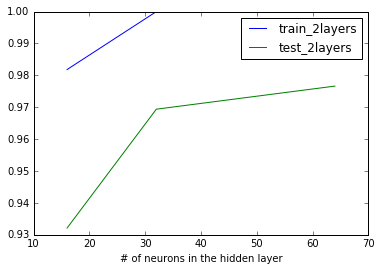

In [51]:
plt.plot([16,32,64],nn_2_train_accuracies,label='train_2layers')
plt.plot([16,32,64],nn_2_test_accuracies,label='test_2layers')
plt.legend()
plt.xlabel('# of neurons in the 2 hidden layers')
plt.ylabel('average accuracy')

In [49]:
nn_2_train_accuracies

[]

### 3 hidden layers and 6 k fold cross validation

In [21]:
kf = KFold(n_splits=6, shuffle=True, random_state=2)
nn_3_test_accuracies=[]
nn_3_train_accuracies=[]
neurons=[
    (10,10,10,),
    (64,64,64,),
    (128,128,128,)
        ]
#we test different number of neurons in the hidden layer  
for n in neurons:
    fold_train_accuracies=[]
    fold_test_accuracies=[]
    #split data
    for train_index, test_index in kf.split(features):
        train_features=features.loc[train_index]
        test_features=features.loc[test_index]
        train_labels=labels.loc[train_index]
        test_labels = labels.loc[test_index]

        #train the model    
        nn=MLPClassifier(hidden_layer_sizes=n,activation='logistic')
        nn.fit(train_features,train_labels)
        fold_train_accuracy=nn.score(train_features,train_labels)
        fold_train_accuracies.append(fold_train_accuracy)
        
        #predict
        #prediction=nn.predict(test_features)
        fold_test_accuracy=nn.score(test_features,test_labels)
        fold_test_accuracies.append(fold_test_accuracy)
        
    #report mean accuracy for each number of neuros
    nn_3_test_accuracies.append(np.mean(fold_test_accuracies))
    nn_3_train_accuracies.append(np.mean(fold_train_accuracies))
    print('for n={} the accurency is '.format(n),np.mean(nn_3_test_accuracies))    

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



for n=(10, 10, 10) the accurency is  0.6323355629877369
for n=(64, 64, 64) the accurency is  0.8019806763285023
for n=(128, 128, 128) the accurency is  0.8587173293695033


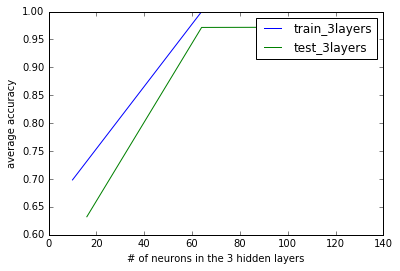

In [22]:
plt.plot([10,64,128],nn_3_train_accuracies,label='train_3layers')
plt.plot([16,64,128],nn_3_test_accuracies,label='test_3layers')
plt.legend()
plt.xlabel('# of neurons in the 3 hidden layers')
plt.ylabel('average accuracy')

there is a overfitting with 64 neurons in the hidden layers

https://github.com/dataquestio/solutions/blob/master/Mission244Solutions.ipynb
